We don't know in which neighbor number we get the best accuracy, so, let's visualized

In [1]:
# let's do like previously

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [5]:
# lets run the loop 1 to 25 for the neighbors

neighbors_settings = list(range(1, 26))
scores = []

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]


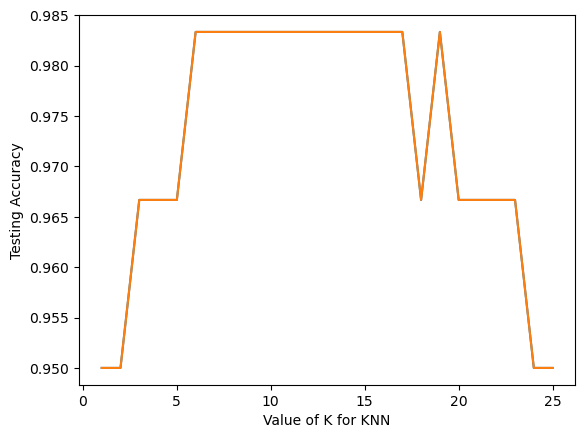

In [9]:
# let's visualize the result
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(neighbors_settings, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [13]:
# here here we see 7 to 17 give good accuracy, so let's test with 10 for example

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [15]:
# let's predict completely new value
knn.predict([[3, 5, 4, 2]])

array([1])

In [17]:
print("Predicted target name:",
       iris['target_names'][knn.predict([[3, 5, 4, 2]])])

Predicted target name: ['versicolor']


Stratify parameter in train_test_split:
code: stratify=y
suppose y have 90% 0 value and 10% 1 value. In that case if we try to split data for training, there can all data be 0 causes imbalanced. So, to balance the training, we use stratify=y.
We will mention this in below code,

In [9]:
# Let's visualize training set and testing set accuracy

%matplotlib inline

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=4)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy =[]

neighbors_settings = range(1, 26)

In [13]:
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

In [15]:
training_accuracy

[1.0,
 0.9732142857142857,
 0.9642857142857143,
 0.9732142857142857,
 0.9642857142857143,
 0.9553571428571429,
 0.9732142857142857,
 0.9642857142857143,
 0.9642857142857143,
 0.9553571428571429,
 0.9732142857142857,
 0.9642857142857143,
 0.9642857142857143,
 0.9553571428571429,
 0.9642857142857143,
 0.9464285714285714,
 0.9642857142857143,
 0.9553571428571429,
 0.9553571428571429,
 0.9464285714285714,
 0.9464285714285714,
 0.9464285714285714,
 0.9553571428571429,
 0.9464285714285714,
 0.9375]

In [17]:
import matplotlib.pyplot as plt

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Numbers of neighbors")
plt.legend()

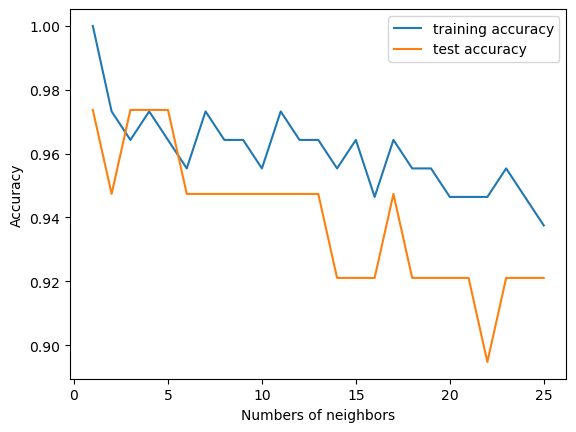

In [19]:
plt.show()